# Lab 2: Classification

- Name 1: Jasmine Coleman
- Name 2: Yat Leung
- Name 3: Karen Somes

__Data Cleaning:__  
First, we removed variables with high correlation, repetitive values, and attributes with a high number of missing values to narrow our focus of predictors and then we performed data transformations to aid our analysis.

In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
 
data = pd.read_csv("/Users/jazis/Downloads/listings.csv")

#data cleaning from LAB1
#drop redundant info and fields not useful for analysis
sub=data.drop(['id','listing_url','scrape_id','last_scraped','summary','space','description','experiences_offered'
              , 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
              'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url',
              'host_picture_url', 'country_code', 'country','amenities', 'minimum_minimum_nights',
              'maximum_minimum_nights','minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
              'maximum_nights_avg_ntm', 'availability_30', 'availability_365','availability_90','has_availability',
               'calculated_host_listings_count','calculated_host_listings_count_shared_rooms',
               'is_business_travel_ready','host_about', 'host_acceptance_rate', 'host_total_listings_count',
              'jurisdiction_names','license','monthly_price','square_feet','weekly_price', 'requires_license'], axis=1)
def money_to_decimal(x):
    x = x.replace("$", "").replace(",", "").replace(" ", "")
    return float(x)
def rem_percent(x):
    x=x.replace("%","")
    return float(x)/100
def truncate(n):
    return int(n * 1000) / 1000
#converts objects with money values into decimal values to become continous attribute
sub.cleaning_fee = sub.cleaning_fee.astype(str)
sub.extra_people = sub.extra_people.astype(str)
sub.security_deposit = sub.security_deposit.astype(str)
sub.price = sub.price.astype(str)
sub.loc[:,'price'] = sub.loc[:,'price'].apply(money_to_decimal)
sub.loc[:,'cleaning_fee'] = sub.loc[:,'cleaning_fee'].apply(money_to_decimal)
sub.loc[:,'extra_people'] = sub.loc[:,'extra_people'].apply(money_to_decimal)
sub.loc[:,'security_deposit'] = sub.loc[:,'security_deposit'].apply(money_to_decimal)
sub.host_response_rate = sub.host_response_rate.astype(str)
sub.loc[:,'host_response_rate'] = sub.loc[:, 'host_response_rate'].apply(rem_percent)

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


__Creating dummy variables classification__

We created dummy variables for the categorical variables that we would include in the model. We iteratively determined which categorical variables to include by checking the accuracy of each interim model when removing terms.

In [2]:
#Creating target variable for host review scores
df = sub[~sub['review_scores_rating'].isnull()]
df['score_levels'] = np.where(((df['review_scores_rating']>=0) & (df['review_scores_rating']<33)), 0, (np.where(((df['review_scores_rating']>=33) & (df['review_scores_rating']<67)), 1,2)))

df_data=df
df_y=df['score_levels']

#create dummy vars
##host_loc = pd.get_dummies(df_data['host_location'],drop_first=True)
host_response = pd.get_dummies(df_data['host_response_time'],drop_first=True)
##host_neigh = pd.get_dummies(df_data['neighbourhood_group_cleansed'],drop_first=True)
##host_verif = pd.get_dummies(df_data['host_verifications'],drop_first=True)
df_data['host_identity_verified'] = pd.get_dummies(df_data['host_identity_verified'],drop_first=True)
##street = pd.get_dummies(df_data['street'],drop_first=True)
neighborhood = pd.get_dummies(df_data['neighbourhood_group_cleansed'],drop_first=True)
##city = pd.get_dummies(df_data['city'],drop_first=True)
# make into continuous zipcode = pd.get_dummies(x_train['zipcode'],drop_first=True)
##market = pd.get_dummies(df_data['market'],drop_first=True)
df_data['is_location_exact'] = pd.get_dummies(df_data['is_location_exact'],drop_first=True)
prop_type = pd.get_dummies(df_data['property_type'],drop_first=True)
room_type = pd.get_dummies(df_data['room_type'],drop_first=True)
bed_type = pd.get_dummies(df_data['bed_type'],drop_first=True)
df_data['instant_bookable'] = pd.get_dummies(df_data['instant_bookable'],drop_first=True)
cancel = pd.get_dummies(df_data['cancellation_policy'],drop_first=True)
df_data['host_is_superhost'] = pd.get_dummies(df_data['host_is_superhost'],drop_first=True)

df_data.drop(['host_location','host_response_time','host_neighbourhood','host_verifications',
             'street', 'neighbourhood', 'city', 'market', 
             'property_type', 'room_type', 'bed_type', 'instant_bookable',
             'cancellation_policy', 'name', 'host_name', 'host_has_profile_pic', 'neighbourhood_cleansed',
              'neighbourhood_group_cleansed', 'host_neighbourhood', 'smart_location', 'calendar_updated',
             'calendar_last_scraped','require_guest_profile_picture', 'require_guest_phone_verification',
             'host_since', 'first_review', 'last_review', 'state', 'smart_location', 'zipcode','review_scores_rating'],axis=1,inplace=True)

df_data = pd.concat([df_data, host_response, prop_type, room_type,
                    bed_type, cancel, neighborhood],axis=1)

    

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

__Final dataset:__ 

We created a new target variable for our classification task, "score_levels", to categorize a host's score to represent categories of "high", "medium", and "low." A score below 33 is low, a score between 33 and 67 is medium, and 67+ is high. The variables in the final dataset are listed below, used for both regression and classification.

In [3]:
#df_data.head()
print(df_data.columns)

Index(['host_id', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_identity_verified', 'latitude',
       'longitude', 'is_location_exact', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_60', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms', 'reviews_per_month',
       'score_levels', 'within a day', 'within a few hours', 'within an hour',
       'Apartment', 'Bed and breakfast', 'Boat', 'Boutique hotel', 'Bungalow',
       'Cabin', 'Camper/RV', 'Casa particular (Cuba)', 'Castle', 'Cave',
       'Condominium', 'Cottage', 'Dom

## Regression task: Predicting price of AirBnb listing

__Evaluation metrics:__ 

 - To assess the fit of the various models used to predict listing price, we will use mean squared error to validate model performance. This is a comparable metrics across all models since it measures the distance of errors from cross validation, and distance will be in the same scale across models.

__Training and testing sets:__ 

 - We used random sampling to divide the test and training sets. This technique allows for the samples to mimic the population distribution. Since our test sets are quite large, the test and training sets are likely to include the desired classes.

__Models:__ 

 - We will be using linear regression, KNN, and PCA to model the listing price of AirBnbs.

### Linear Regression:

 - To avoid overfitting, we used the K-best algorithm to identify the 10 terms with the highest F-statistics. This approach ensures that relevant terms are included in the model. Those terms were then fitted to price using linear regression.

In [4]:
df = pd.get_dummies(df)
train , test = train_test_split(df, test_size = 0.2)

x_train = train.drop('price', axis=1)
y_train = train['price']

x_test = test.drop('price', axis = 1)
y_test = test['price']


In [5]:
#imputations - training
x_train.cleaning_fee=x_train.cleaning_fee.fillna(x_train.cleaning_fee.median())
x_train.host_response_rate=x_train.host_response_rate.fillna(x_train.host_response_rate.median())
x_train.review_scores_accuracy=x_train.review_scores_accuracy.fillna(truncate(x_train.review_scores_accuracy.median()))
x_train.review_scores_checkin=x_train.review_scores_checkin.fillna(truncate(x_train.review_scores_checkin.median()))
x_train.review_scores_cleanliness=x_train.review_scores_cleanliness.fillna(truncate(x_train.review_scores_cleanliness.median()))
x_train.review_scores_communication=x_train.review_scores_communication.fillna(truncate(x_train.review_scores_communication.median()))
x_train.review_scores_location=x_train.review_scores_location.fillna(truncate(x_train.review_scores_location.median()))
#sub.review_scores_rating=sub.review_scores_rating.fillna(truncate(sub.review_scores_rating.median()))
x_train.review_scores_value=x_train.review_scores_value.fillna(truncate(x_train.review_scores_value.median()))
x_train.reviews_per_month=x_train.reviews_per_month.fillna(x_train.reviews_per_month.median())
x_train.security_deposit=x_train.security_deposit.fillna(x_train.security_deposit.median())
x_train.bathrooms=x_train.bathrooms.fillna(x_train.bathrooms.median())
x_train.bedrooms=x_train.bedrooms.fillna(x_train.bedrooms.median())
x_train.host_listings_count=x_train.host_listings_count.fillna(x_train.host_listings_count.median())
x_train.beds=x_train.beds.fillna(x_train.beds.median())
#sub.host_response_time=sub.host_response_time.fillna('missing')

In [6]:
#imputations - test
x_test.cleaning_fee=x_test.cleaning_fee.fillna(x_train.cleaning_fee.median())
x_test.host_response_rate=x_test.host_response_rate.fillna(x_train.host_response_rate.median())
x_test.review_scores_accuracy=x_test.review_scores_accuracy.fillna(truncate(x_train.review_scores_accuracy.median()))
x_test.review_scores_checkin=x_test.review_scores_checkin.fillna(truncate(x_train.review_scores_checkin.median()))
x_test.review_scores_cleanliness=x_test.review_scores_cleanliness.fillna(truncate(x_train.review_scores_cleanliness.median()))
x_test.review_scores_communication=x_test.review_scores_communication.fillna(truncate(x_train.review_scores_communication.median()))
x_test.review_scores_location=x_test.review_scores_location.fillna(truncate(x_train.review_scores_location.median()))
#sub.review_scores_rating=sub.review_scores_rating.fillna(truncate(sub.review_scores_rating.median()))
x_test.review_scores_value=x_test.review_scores_value.fillna(truncate(x_train.review_scores_value.median()))
x_test.reviews_per_month=x_test.reviews_per_month.fillna(x_train.reviews_per_month.median())
x_test.security_deposit=x_test.security_deposit.fillna(x_train.security_deposit.median())
x_test.bathrooms=x_test.bathrooms.fillna(x_train.bathrooms.median())
x_test.bedrooms=x_test.bedrooms.fillna(x_train.bedrooms.median())
x_test.host_listings_count=x_test.host_listings_count.fillna(x_train.host_listings_count.median())
x_test.beds=x_test.beds.fillna(x_train.beds.median())
#sub.host_response_time=sub.host_response_time.fillna('missing')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

###would need to add imputations

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
#import required packages
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn.metrics import mean_squared_error 
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
#%matplotlib inline


In [9]:
model = feature_selection.SelectKBest(score_func=feature_selection.f_regression,\
                                      k=10).fit(x_train,y_train)

results = model.transform(x_train) # not needed to get the score


#results = model.fit_transform(x_train, y_train)


In [10]:
cols = model.get_support(indices=True) 
df.columns[cols]

Index(['longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'security_deposit', 'cleaning_fee', 'maximum_nights',
       'review_scores_communication'],
      dtype='object')

In [11]:
feat_scores = pd.DataFrame()
feat_scores["F Score"] = model.scores_
feat_scores["P Value"] = model.pvalues_
feat_scores["Support"] = model.get_support()
feat_scores[feat_scores['Support'] == 1]

,F Score,P Value,Support
6,690.118654,2.068504e-150,True
8,3939.959260,0.000000e+00,True
9,1270.678639,1.202371e-272,True
10,2210.063149,0.000000e+00,True
11,2166.406057,0.000000e+00,True
12,1250.611859,1.845973e-268,True
13,4065.798309,0.000000e+00,True
14,1449.406600,8.213255e-310,True
18,172.963577,2.139361e-39,True
25,165.708461,8.055194e-38,True


In [14]:
lm = LinearRegression()
x_10 = pd.DataFrame(x_train[cols])
lm.fit(x_10, y_train)
print(lm.coef_)

[-247.12182894  458.0862386   593.3061174   139.39594941 -332.45128718
  212.28529393  680.28415508   -7.14226874   35.36569424   98.9085268 ]


__Results:__

 - The scatter plots below show how individual key predictors are associated with the listing price of the AirBnb, to show the strength of the relationship. These graphs in particular show how listings that have accommodations considerably different from the others (large number of beds, bathrooms) affect the relationship of the predictor with the listing price.
 
 - The scatter plot that shows the accuracy of predicted values shows that the linear regression model greatly underestimates the value of airbnbs.
 
 - The residual plot shows that the model has difficultly accounting for extreme values.

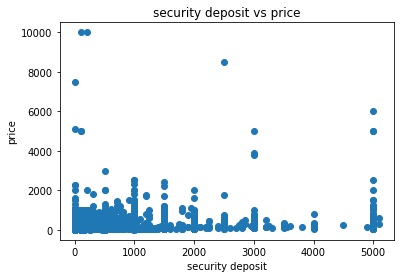

In [15]:
plt.scatter(df['security_deposit'], df.price)
plt.xlabel("security deposit")
plt.ylabel("price")
plt.title("security deposit vs price")
plt.show()


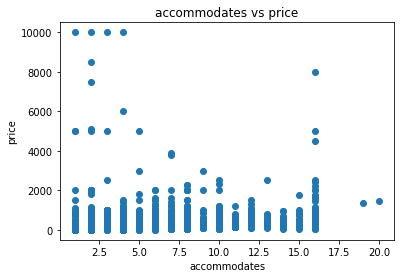

In [16]:
plt.scatter(df['accommodates'], df.price)
plt.xlabel("accommodates")
plt.ylabel("price")
plt.title("accommodates vs price")
plt.show()

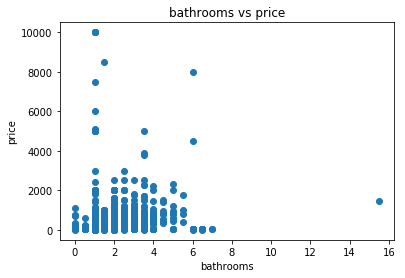

In [17]:
plt.scatter(df['bathrooms'], df.price)
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.title("bathrooms vs price")
plt.show()

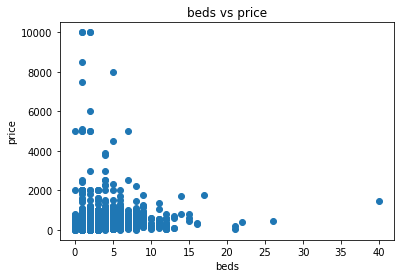

In [18]:
plt.scatter(df['beds'], df.price)
plt.xlabel("beds")
plt.ylabel("price")
plt.title("beds vs price")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

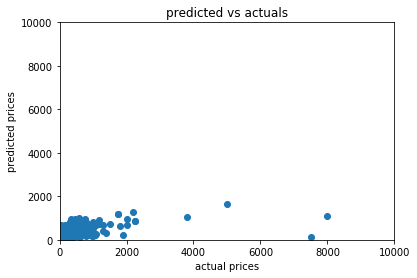

In [19]:
plt.scatter(y_test, lm.predict(x_test[cols]))
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.axis([0, 10000, 0, 10000])
plt.title("predicted vs actuals")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

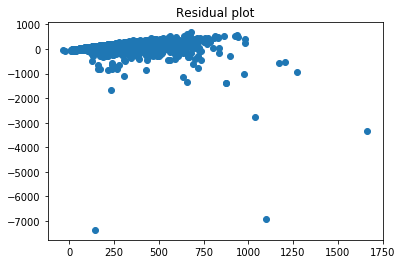

In [20]:
plt.scatter(lm.predict(x_test[cols]), lm.predict(x_test[cols])-y_test)
plt.title("Residual plot")
plt.show

In [21]:
#MSE
y_pred=lm.predict(x_test[cols])
print(np.mean((y_test-y_pred)**2))
print(metrics.r2_score(y_test,y_pred))

32509.67575537839
0.1251287015789102


The model has a mean-squared error of 32,509 and a $R^2$ value of 0.125. The model is accounting for about 13% of the variation in sale price and is therefore unlikely to have reliable predictive power.

### PCA:

In [22]:
train , test = train_test_split(df_data, test_size = 0.2)

x_train = train.drop('price', axis=1)
y_train = train['price']

x_test = test.drop('price', axis = 1)
y_test = test['price']

In [24]:
#imputations - training
x_train.cleaning_fee=x_train.cleaning_fee.fillna(x_train.cleaning_fee.median())
x_train.host_response_rate=x_train.host_response_rate.fillna(x_train.host_response_rate.median())
x_train.review_scores_accuracy=x_train.review_scores_accuracy.fillna(truncate(x_train.review_scores_accuracy.median()))
x_train.review_scores_checkin=x_train.review_scores_checkin.fillna(truncate(x_train.review_scores_checkin.median()))
x_train.review_scores_cleanliness=x_train.review_scores_cleanliness.fillna(truncate(x_train.review_scores_cleanliness.median()))
x_train.review_scores_communication=x_train.review_scores_communication.fillna(truncate(x_train.review_scores_communication.median()))
x_train.review_scores_location=x_train.review_scores_location.fillna(truncate(x_train.review_scores_location.median()))
#sub.review_scores_rating=sub.review_scores_rating.fillna(truncate(sub.review_scores_rating.median()))
x_train.review_scores_value=x_train.review_scores_value.fillna(truncate(x_train.review_scores_value.median()))
x_train.reviews_per_month=x_train.reviews_per_month.fillna(x_train.reviews_per_month.median())
x_train.security_deposit=x_train.security_deposit.fillna(x_train.security_deposit.median())
x_train.bathrooms=x_train.bathrooms.fillna(x_train.bathrooms.median())
x_train.bedrooms=x_train.bedrooms.fillna(x_train.bedrooms.median())
x_train.host_listings_count=x_train.host_listings_count.fillna(x_train.host_listings_count.median())
x_train.beds=x_train.beds.fillna(x_train.beds.median())
#sub.host_response_time=sub.host_response_time.fillna('missing')

In [25]:
#imputations - test
x_test.cleaning_fee=x_test.cleaning_fee.fillna(x_train.cleaning_fee.median())
x_test.host_response_rate=x_test.host_response_rate.fillna(x_train.host_response_rate.median())
x_test.review_scores_accuracy=x_test.review_scores_accuracy.fillna(truncate(x_train.review_scores_accuracy.median()))
x_test.review_scores_checkin=x_test.review_scores_checkin.fillna(truncate(x_train.review_scores_checkin.median()))
x_test.review_scores_cleanliness=x_test.review_scores_cleanliness.fillna(truncate(x_train.review_scores_cleanliness.median()))
x_test.review_scores_communication=x_test.review_scores_communication.fillna(truncate(x_train.review_scores_communication.median()))
x_test.review_scores_location=x_test.review_scores_location.fillna(truncate(x_train.review_scores_location.median()))
#sub.review_scores_rating=sub.review_scores_rating.fillna(truncate(sub.review_scores_rating.median()))
x_test.review_scores_value=x_test.review_scores_value.fillna(truncate(x_train.review_scores_value.median()))
x_test.reviews_per_month=x_test.reviews_per_month.fillna(x_train.reviews_per_month.median())
x_test.security_deposit=x_test.security_deposit.fillna(x_train.security_deposit.median())
x_test.bathrooms=x_test.bathrooms.fillna(x_train.bathrooms.median())
x_test.bedrooms=x_test.bedrooms.fillna(x_train.bedrooms.median())
x_test.host_listings_count=x_test.host_listings_count.fillna(x_train.host_listings_count.median())
x_test.beds=x_test.beds.fillna(x_train.beds.median())
#sub.host_response_time=sub.host_response_time.fillna('missing')

In [26]:
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()

x_train_scaled = scl_obj.fit_transform(x_train) # apply to training
x_test_scaled = scl_obj.transform(x_test) 



C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [27]:
#converting training numpy to pandas df to inpute nan values
cols = list(x_train.columns.values)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=cols)

In [28]:
#converting training numpy to pandas df to inpute nan values
cols2 = list(x_test.columns.values)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=cols2)

In [30]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.75)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

n_pca = pca.n_components_
explained_variance = pca.explained_variance_ratio_
total_variance = total_variance = np.sum(explained_variance)
print('Number of Components:', n_pca )

#print(' \n PCA Components:')
#print(pd.DataFrame(pca.components_).head())

print(' \n Percentage of Explained Variance:')
print(explained_variance)

print(' \n Total Variance:', total_variance )

Number of Components: 41
 
 Percentage of Explained Variance:
[0.05770838 0.05201282 0.04458166 0.03460962 0.02790857 0.02532033
 0.02435929 0.02166157 0.02003515 0.01934034 0.01786955 0.01674003
 0.01590369 0.01552194 0.01480361 0.01451908 0.01428423 0.01364074
 0.01352312 0.0133698  0.01327038 0.0132426  0.01320001 0.01313128
 0.01309815 0.01307588 0.01303715 0.01302534 0.01301447 0.01300559
 0.01300029 0.01299573 0.01299258 0.01299147 0.0129903  0.01298337
 0.01297642 0.01296964 0.0129637  0.012897   0.01284316]
 
 Total Variance: 0.7514180591293945


In [31]:
# Fitting Linear Regression To the training set 
from sklearn.linear_model import LinearRegression   
  
lm = LinearRegression() 
lm.fit(x_train_pca, y_train)
print(lm.coef_)
print(lm.intercept_) 

[ -5.92489419  30.19967166 -30.83945219   9.00676703  -3.48365466
   3.75836314  -0.69389381   2.24573218  11.78593992   2.93113808
  -3.05017103  -2.59418858  -8.22240064  -2.56206715  -4.93900623
  -2.13750588  -1.03591035   7.67456458  -1.88719994   3.25727341
  -7.53434582  -2.65379861   2.85725196   3.89638987   2.62730017
   0.19614887  -1.89601207  -4.30439067  -1.62755913  -0.3730162
   0.57041631  -1.0133456   -0.03762903   0.84627539   0.55351069
  -0.0445498    0.56059858  -0.9653736    2.73074963   3.44960156
   0.44228832]
141.0731594279661


In [33]:
# Predicting the test set result using  
# predict function under LogisticRegression  
y_pred = lm.predict(x_test_pca) 

R_Square = lm.score(x_test_pca, y_test)
print('R-squared: ', R_Square )

R-squared:  0.2267155483201576


In [34]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

28809.813194687464

__Results:__ 

 - The linear regression model using all PCA components has a mean-squared error of 28,809 and a $R^2$ value of 0.227.  
 - The PCA model reduced the dimensions of the training set to 41 components which explain 75% of the total variance in model.  
 - The first two components only explain ~11% of the total variance in the model with all subsequent components each explaining less than 5% of the total variance.  
 - We test several PCA models adjusting for number of components and percentage of variation explained, but only included the final model in this notebook.
 

### KNN Regression:

In [35]:
#Regression on Pricing
#price is the variable to look at
from sklearn.preprocessing import Imputer
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:

if 'price' in df_data:
    y = df_data['price'].values # get the labels we want
    del df_data['price'] # get rid of the class label
    X = df_data.values # use everything else to predict!


    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    

# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)
#split data into train and test set

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [36]:
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

In [37]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, strategy='median', axis = 0)
#Impute missing values for the train set
imputer = imp.fit(X_train[:, :-1])
X_train[:, :-1] = imputer.transform(X_train[:, :-1])

#Impute missing values for the test set
imputer = imp.fit(X_test[:, :-1])
X_test[:, :-1] = imputer.transform(X_test[:, :-1])

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 191.07800889163443
RMSE value for k=  2 is: 186.57835065248966
RMSE value for k=  3 is: 178.08329264419268
RMSE value for k=  4 is: 179.1009868522762
RMSE value for k=  5 is: 173.1852169337983
RMSE value for k=  6 is: 171.8799618462863
RMSE value for k=  7 is: 170.73098391751853
RMSE value for k=  8 is: 169.4852624130443
RMSE value for k=  9 is: 167.3968706082745
RMSE value for k=  10 is: 165.8977212886319


__Plotting the KNN Regression Test Accuracy__

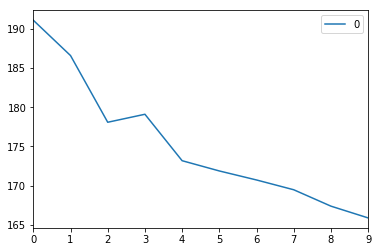

In [39]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [41]:
#find best number of neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 10}

For KNN regression, we tested the model up to 10 neighbors and calculated RMSE for each increase in neighbor k. At k=10, the calculated RMSE was approximately 139 (or a MSE of 66,883). 

The KNN's MSE metric was not better than PCA with feature selection (MSE of 28011) since PCA was not performed prior to KNN regression. This means that the KNN model had all the non-reduced information (and dimensions) and could have inflated the RMSE metric and appeared to be under-fitting.

Also based on the MSE metric, KNN did not outperform the linear model (MSE of 66,883 VS 56,423). The latter utilised a feature_selection toolkit from sklearn to choose 10 best features to be included in the model.

The linear model with feature_selection did narrow down some price influencing features such as Longitude.
 - Latitude was not important. Longtitudinal change determines the rental unit's NYC boroughs (neighborhoods)

The remaining features were: 
 - accommodates, bathrooms, bedrooms, beds, security_deposit, cleaning_fee. guests_included, review_scores_communication 
 - which explained how many persons can the property host, number of bathrooms/bedrooms/beds, the deposit amount, cleaning fee, number of guests that the renter can bring, a subjective score on communication.

The PCA linear regression would be a better representation of generalizing the price prediction problem as the PCA portion would reduced some unnecessary information prior to selecting the variables for regression modeling. Therefore it would be less likely to be overfitted.

## Classification task: Classifiying review scores of AirBnb hosts

__Evaluation metrics:__ 

 - To assess the performance of the classification models, we will use accuracy, precision, recall, F-1, and support to determine how the well the model can categorize across the three different levels. By using all 5 of these evaluation measures, we can more thoroughly compare models performance for any level of rating.

__Training and testing sets:__ 

 - We used random sampling to divide the test and training sets. This technique allows for the samples to mimic the population distribution. Since our test sets are quite large, the test and training sets are likely to include the desired classes.

__Models:__ 

 - We used KNN, SVM, and decision trees to classify a host's review score.
 
### KNN:

 - We focused on the continuous predictors for clustering since the algorithm assesses distances between observations, and the categorical dummy variables have arbitrary distances between them. This not only increased algorthmic speed but also did not worsen the fit of the model.

In [42]:
#imputations - training
df.cleaning_fee=x_train.cleaning_fee.fillna(x_train.cleaning_fee.median())
df.host_response_rate=x_train.host_response_rate.fillna(x_train.host_response_rate.median())
df.review_scores_accuracy=x_train.review_scores_accuracy.fillna(truncate(x_train.review_scores_accuracy.median()))
df.review_scores_checkin=x_train.review_scores_checkin.fillna(truncate(x_train.review_scores_checkin.median()))
df.review_scores_cleanliness=x_train.review_scores_cleanliness.fillna(truncate(x_train.review_scores_cleanliness.median()))
df.review_scores_communication=x_train.review_scores_communication.fillna(truncate(x_train.review_scores_communication.median()))
df.review_scores_location=x_train.review_scores_location.fillna(truncate(x_train.review_scores_location.median()))
#sub.review_scores_rating=sub.review_scores_rating.fillna(truncate(sub.review_scores_rating.median()))
df.review_scores_value=x_train.review_scores_value.fillna(truncate(x_train.review_scores_value.median()))
df.reviews_per_month=x_train.reviews_per_month.fillna(x_train.reviews_per_month.median())
df.security_deposit=x_train.security_deposit.fillna(x_train.security_deposit.median())
df.bathrooms=x_train.bathrooms.fillna(x_train.bathrooms.median())
df.bedrooms=x_train.bedrooms.fillna(x_train.bedrooms.median())
df.host_listings_count=x_train.host_listings_count.fillna(x_train.host_listings_count.median())
df.beds=x_train.beds.fillna(x_train.beds.median())
#sub.host_response_time=sub.host_response_time.fillna('missing')

In [43]:
df=df.dropna(how='any')
df = pd.get_dummies(df)
train , test = train_test_split(df, test_size = 0.2)

x_train_knn = train.drop('score_levels', axis=1)
y_train_knn = train['score_levels']

x_test_knn = test.drop('score_levels', axis = 1)
y_test_knn = test['score_levels']

In [44]:
df_cont = x_train_knn.select_dtypes(include=['int', 'float']).columns #continuous columns
x_train_knn=x_train_knn[df_cont]

x_test_knn=x_test_knn[df_cont]

In [45]:
y_train_knn.isnull().values.any()

False

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled_knn = scaler.fit_transform(x_train_knn)
x_train_knn = pd.DataFrame(x_train_scaled_knn)

x_test_scaled_knn = scaler.fit_transform(x_test_knn)
x_test_knn = pd.DataFrame(x_test_scaled_knn)


In [47]:
from sklearn import metrics
from sklearn.metrics import average_precision_score

In [48]:
for K in range(5):
    K = K+1
    knn = neighbors.KNeighborsClassifier(n_neighbors=K)

    knn.fit(x_train_knn, y_train_knn)  #fit the model
    y_pred_knn = knn.predict(x_test_knn)
    print("Accuracy:",metrics.accuracy_score(y_test_knn, y_pred_knn))
    cr = metrics.classification_report(y_test_knn, y_pred_knn)


Accuracy: 0.9864283349884144
Accuracy: 0.9867593512082092
Accuracy: 0.9877523998675936
Accuracy: 0.9884144323071831
Accuracy: 0.9884144323071831


In [49]:
knn = neighbors.KNeighborsClassifier(n_neighbors=4)

knn.fit(x_train_knn, y_train_knn)  #fit the model
y_pred_knn = knn.predict(x_test_knn)
cr = metrics.classification_report(y_test_knn, y_pred_knn)
print("Accuracy:",metrics.accuracy_score(y_test_knn, y_pred_knn))

Accuracy: 0.9884144323071831


In [50]:
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.67      0.47      0.55        92
           2       0.99      1.00      0.99      5935

   micro avg       0.99      0.99      0.99      6042
   macro avg       0.82      0.75      0.78      6042
weighted avg       0.99      0.99      0.99      6042



__Results:__ 

 - KNN classifies "high" reviews the best compared to the other two classes, most likely due to do the greater concentration of observations in that class. 
 - It is next best at classifying "low" reviews, as shown by the f1-score (which balances the precision and recall scores). This is not surprising, since the clustering algorithm best predicts extreme values and has more difficulty with middle-of-the-road listings.
 - The accuracy of the model with 4 neighbors is 98.88%. This is very high, perhaps indicating overfitting or the prevalance of high ratings.

### SVM:

In [51]:
##splitting prection from predictor variables

from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:

if 'score_levels' in df_data:
    y = df_data['score_levels'].values # get the labels we want
    del df_data['score_levels'] # get rid of the class label
    X = df_data.values # use everything else to predict!


    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    

# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [52]:
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]


In [53]:
#converting training numpy to pandas df to inpute nan values
cols = list(df_data.columns.values)
impute = pd.DataFrame(X_train, columns=cols)
#impute

#converting test numpy to pandas df to inpute nan values
cols = list(df_data.columns.values)
impute_test = pd.DataFrame(X_test, columns=cols)
#impute_test

In [54]:
#imputations - training
#impute['price']=impute.price.mask(impute.price == 0,impute.price.median())
impute.cleaning_fee=impute.cleaning_fee.fillna(impute.cleaning_fee.median())
impute.host_response_rate=impute.host_response_rate.fillna(impute.host_response_rate.median())
impute.review_scores_accuracy=impute.review_scores_accuracy.fillna(truncate(impute.review_scores_accuracy.median()))
impute.review_scores_checkin=impute.review_scores_checkin.fillna(truncate(impute.review_scores_checkin.median()))
impute.review_scores_cleanliness=impute.review_scores_cleanliness.fillna(truncate(impute.review_scores_cleanliness.median()))
impute.review_scores_communication=impute.review_scores_communication.fillna(truncate(impute.review_scores_communication.median()))
impute.review_scores_location=impute.review_scores_location.fillna(truncate(impute.review_scores_location.median()))
#sub.review_scores_rating=sub.review_scores_rating.fillna(truncate(sub.review_scores_rating.median()))
impute.review_scores_value=impute.review_scores_value.fillna(truncate(impute.review_scores_value.median()))
impute.reviews_per_month=impute.reviews_per_month.fillna(impute.reviews_per_month.median())
impute.security_deposit=impute.security_deposit.fillna(impute.security_deposit.median())
impute.bathrooms=impute.bathrooms.fillna(impute.bathrooms.median())
impute.bedrooms=impute.bedrooms.fillna(impute.bedrooms.median())
impute.host_listings_count=impute.host_listings_count.fillna(impute.host_listings_count.median())
impute.beds=impute.beds.fillna(impute.beds.median())
#sub.host_response_time=sub.host_response_time.fillna('missing')

In [55]:
#imputations - test
#impute_test['price']=impute_test.price.mask(impute.price == 0,impute.price.median())
impute_test.cleaning_fee=impute_test.cleaning_fee.fillna(impute.cleaning_fee.median())
impute_test.host_response_rate=impute_test.host_response_rate.fillna(impute.host_response_rate.median())
impute_test.review_scores_accuracy=impute_test.review_scores_accuracy.fillna(truncate(impute.review_scores_accuracy.median()))
impute_test.review_scores_checkin=impute_test.review_scores_checkin.fillna(truncate(impute.review_scores_checkin.median()))
impute_test.review_scores_cleanliness=impute_test.review_scores_cleanliness.fillna(truncate(impute.review_scores_cleanliness.median()))
impute_test.review_scores_communication=impute_test.review_scores_communication.fillna(truncate(impute.review_scores_communication.median()))
impute_test.review_scores_location=impute_test.review_scores_location.fillna(truncate(impute.review_scores_location.median()))
#sub.review_scores_rating=sub.review_scores_rating.fillna(truncate(sub.review_scores_rating.median()))
impute_test.review_scores_value=impute_test.review_scores_value.fillna(truncate(impute.review_scores_value.median()))
impute_test.reviews_per_month=impute_test.reviews_per_month.fillna(impute.reviews_per_month.median())
impute_test.security_deposit=impute_test.security_deposit.fillna(impute.security_deposit.median())
impute_test.bathrooms=impute_test.bathrooms.fillna(impute.bathrooms.median())
impute_test.bedrooms=impute_test.bedrooms.fillna(impute.bedrooms.median())
impute_test.host_listings_count=impute_test.host_listings_count.fillna(impute.host_listings_count.median())
impute_test.beds=impute_test.beds.fillna(impute.beds.median())
#sub.host_response_time=sub.host_response_time.fillna('missing')

In [56]:
#converting pandas df back to numpy matrix - for train
X_train = impute.values

#converting pandas df back to numpy matrix - for test
X_test = impute_test.values

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
imp = Imputer(strategy="median", axis=0)

# scale attributes by the training set
scl_obj = StandardScaler()
#scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.fit_transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [58]:
from sklearn.svm import SVC
from sklearn import metrics as mt

# train the model just as before
svm_clf = SVC(C=10, kernel='rbf', degree=3, gamma='auto',class_weight='balanced') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
cr = mt.classification_report(y_test, y_hat)
print('accuracy:', acc )
print(conf)
print(cr)

accuracy: 0.9856991525423728
[[  20    8    3]
 [   3   79   42]
 [   3   49 7345]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        31
           1       0.58      0.64      0.61       124
           2       0.99      0.99      0.99      7397

   micro avg       0.99      0.99      0.99      7552
   macro avg       0.78      0.76      0.77      7552
weighted avg       0.99      0.99      0.99      7552



In [59]:
print('(observations, variables):')
print(svm_clf.support_vectors_.shape) #(observations, variables) to be support vectors

#print(svm_clf.support_.shape) #(observations,) on the edge of vector

print('\n Observations on the edge of a class:')
print(svm_clf.n_support_ ) #([observations on the edge for one class/ obs on edge for the other class ])

(observations, variables):
(1792, 79)

 Observations on the edge of a class:
[  68  304 1420]


In [60]:
# Instances chosen as support vectors

# make a dataframe of the training data
df_tested_on = df_data.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['score_levels'] = y[svm_clf.support_] # add back in the 'score_levels' column to the pandas dataframe
df_data['score_levels'] = y # also add it back in for the original data
df_support.columns

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['host_id', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_identity_verified', 'latitude',
       'longitude', 'is_location_exact', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_60', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms', 'reviews_per_month',
       'within a day', 'within a few hours', 'within an hour', 'Apartment',
       'Bed and breakfast', 'Boat', 'Boutique hotel', 'Bungalow', 'Cabin',
       'Camper/RV', 'Casa particular (Cuba)', 'Castle', 'Cave', 'Condominium',
       'Cottage', 'Dome house', 'Earth house', 

__Results:__ (Analyze the results using your chosen method of evaluation. Use
visualizations of the results to bolster the analysis. Explain any visuals and analyze why
they are interesting to someone that might use this model.)

 - The SVM model was 98% accurate and had a weighted average F1-score of 99%.
 - The SVM model does best classifying "high" reviews. Because the ratings variable is highly unbalanced and the majority of scores are high, it is not surprising that the model ad 99% recall and precision for classifying ratings in that class.
 - Like the KNN model, it classified "low" reviews with the second highest average F1-score of 98%. Although it was more precise in classifying "low" ratings at 82% (over 49% for "medium" ratings), it had higher recall classifying "medium" ratings at 62% (over 58% for "low" ratings).
 - There 1770 observations on edge of a class resulting in 79 support vectors. 78% of the observations were on edge of "high" ratings class, 18% of the observations were on the edge of the "medium" rating class, and remaining 4% belonged to the "low" class.
 - The instances chosen as support vectors include variables pertaining to the cancellation policy, location (neighborhood and coordinates), accommodations (property type, bed type, rooms, etc.), host characteristics (id, response rate, verified, etc.), and other rating categories. The support vectors range to include many different types of variables, but there is no specific category that stands out. However, many of the support vectors are from levels of a categorical variable that had very small volumes (like castle, caves, pull-out sofa) or many unique values (like host id or price). It makes sense that the model would have a harder time predicting a classification class when there is very little training data available.
 
 ### Decision Tree:

In [61]:
##splitting prection from predictor variables
from sklearn.preprocessing import Imputer
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:

if 'perf_score' in df_data:
    y = df_data['perf_score'].values # get the labels we want
    del df_data['perf_score'] # get rid of the class label
    X = df_data.values # use everything else to predict!


    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    

# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

In [62]:
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

In [63]:
#Missing Values Imputation
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, strategy='median', axis = 0)
#Impute missing values for the train set
imputer = imp.fit(X_train[:, :-1])
X_train[:, :-1] = imputer.transform(X_train[:, :-1])

#Impute missing values for the test set
imputer = imp.fit(X_test[:, :-1])
X_test[:, :-1] = imputer.transform(X_test[:, :-1])

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt

dt_clf=DecisionTreeClassifier()
for train, test in cv_object.split(X,y):
    print ('Training Once:')
    # train the decision tree algorithm
    %time dt_clf.fit(X_train,y_train)
    yhat = dt_clf.predict(X_test)
    print ('accuracy:', mt.accuracy_score(y_test,yhat))

Training Once:
Wall time: 624 ms
accuracy: 0.984375
Training Once:
Wall time: 649 ms
accuracy: 0.9847722457627118
Training Once:
Wall time: 619 ms
accuracy: 0.9845074152542372


In [65]:
# from the tutorial: http://www.kaggle.com/c/datasciencebowl/details/tutorial 
def multiclass_log_loss(y_true, y_pred, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    https://www.kaggle.com/wiki/MultiClassLogLoss

    Parameters
    ----------
    y_true : array, shape = [n_samples]
            true class, integers in [0, n_classes - 1)
    y_pred : array, shape = [n_samples, n_classes]

    Returns
    -------
    loss : float
    """
    predictions = np.clip(y_pred, eps, 1 - eps)

    # normalize row sums to 1
    predictions /= predictions.sum(axis=1)[:, np.newaxis]

    actual = np.zeros(y_pred.shape)
    n_samples = actual.shape[0]
    actual[np.arange(n_samples), y_true.astype(int)] = 1
    vectsum = np.sum(actual * np.log(predictions))
    loss = -1.0 / n_samples * vectsum
    return loss

In [66]:
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)
print ('Accuracy:', mt.accuracy_score(y_test,yhat))
print ('Log Loss:', multiclass_log_loss(y_test, class_probabilities))

Accuracy: 0.9845074152542372
Log Loss: 0.5350949203131045


In [67]:
from sklearn.decomposition import PCA

n_components = 50
pca = PCA(n_components=n_components, svd_solver='randomized')

for train, test in cv_object.split(X,y):
    print ('Training Once:')
    
    # transform the data using pca
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    # train the decision tree algorithm
    dt_clf.fit(X_train,y_train)
    yhat = dt_clf.predict(X_test)
    class_probabilities = dt_clf.predict_proba(X_test)
    
    print ('Accuracy:', mt.accuracy_score(y_test,yhat))
    print ('Log Loss:', multiclass_log_loss(y_test, class_probabilities))

Training Once:
Accuracy: 0.9849046610169492
Log Loss: 0.5213745377409736
Training Once:
Accuracy: 0.9842425847457628
Log Loss: 0.5442418420278583
Training Once:
Accuracy: 0.9847722457627118
Log Loss: 0.5259479985983506


In [68]:
#drawing a decision tree (partial tree)
%matplotlib inline
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier


dt_clf=DecisionTreeClassifier(max_depth =4)
fig=dt_clf.fit(X_train,y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(fig,label='root',node_ids=True,fontsize=11,rotate=True)

plt.show()


AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

<Figure size 1440x720 with 0 Axes>

In [69]:
##splitting prection from predictor variables
from sklearn.preprocessing import Imputer
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:

if 'perf_score' in df_data:
    y = df_data['score_levels'].values # get the labels we want
    del df_data['score_levels'] # get rid of the class label
    X = df_data.values # use everything else to predict!


    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    

# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)


In [70]:
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

In [71]:
#Missing Values Imputation
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, strategy='median', axis = 0)
#Impute missing values for the train set
imputer = imp.fit(X_train[:, :-1])
X_train[:, :-1] = imputer.transform(X_train[:, :-1])

#Impute missing values for the test set
imputer = imp.fit(X_test[:, :-1])
X_test[:, :-1] = imputer.transform(X_test[:, :-1])

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt

dt_clf=DecisionTreeClassifier()
for train, test in cv_object.split(X,y):
    print ('Training Once:')
    # train the decision tree algorithm
    %time dt_clf.fit(X_train,y_train)
    yhat = dt_clf.predict(X_test)
    print ('accuracy:', mt.accuracy_score(y_test,yhat))

Training Once:
Wall time: 582 ms
accuracy: 0.9858315677966102
Training Once:
Wall time: 599 ms
accuracy: 0.9855667372881356
Training Once:
Wall time: 553 ms
accuracy: 0.9854343220338984


In [73]:
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)
print ('Accuracy:', mt.accuracy_score(y_test,yhat))
print ('Log Loss:', multiclass_log_loss(y_test, class_probabilities))

Accuracy: 0.9854343220338984
Log Loss: 0.5030806943114658


In [74]:
from sklearn.decomposition import PCA

n_components = 50
pca = PCA(n_components=n_components, svd_solver='randomized')

for train, test in cv_object.split(X,y):
    print ('Training Once:')
    
    # transform the data using pca
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    # train the decision tree algorithm
    dt_clf.fit(X_train,y_train)
    yhat = dt_clf.predict(X_test)
    class_probabilities = dt_clf.predict_proba(X_test)
    
    print ('Accuracy:', mt.accuracy_score(y_test,yhat))
    print ('Log Loss:', multiclass_log_loss(y_test, class_probabilities))
    cr = mt.classification_report(y_test, yhat)
    print(cr)

Training Once:
Accuracy: 0.9855667372881356
Log Loss: 0.4985072334540889
              precision    recall  f1-score   support

           0       0.55      0.48      0.51        25
           1       0.46      0.54      0.50        99
           2       0.99      0.99      0.99      7428

   micro avg       0.99      0.99      0.99      7552
   macro avg       0.67      0.67      0.67      7552
weighted avg       0.99      0.99      0.99      7552

Training Once:
Accuracy: 0.9854343220338984
Log Loss: 0.5030806943114658
              precision    recall  f1-score   support

           0       0.58      0.56      0.57        25
           1       0.47      0.55      0.50        99
           2       0.99      0.99      0.99      7428

   micro avg       0.99      0.99      0.99      7552
   macro avg       0.68      0.70      0.69      7552
weighted avg       0.99      0.99      0.99      7552

Training Once:
Accuracy: 0.9845074152542372
Log Loss: 0.5350949203131045
              preci

In [75]:
#drawing a decision tree (partial tree)
%matplotlib inline
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier(max_depth =4)
fig=dt_clf.fit(X_train,y_train)

plt.figure(figsize=(20,10))

tree.plot_tree(fig,label='root',node_ids=True,fontsize=11,rotate=True)

plt.show()

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

<Figure size 1440x720 with 0 Axes>

In [ ]:
print(df.columns)

__Assessing Decision Tree Classification Accuracy__  
In the first decision tree, we were classifying a binary variable 'perf_score' with an accuracy of 0.81 and a log loss of 6.6 through 3 iterations. Plotting the result with a node depth of 4 showed that there were room for improvement. At node 29 in row 4, it had the lowest gini score of 0.053 compare to the others at the same row level.
For the second decision tree, we created a 3-level categorical variable 'score_levels' to sort the rating into (0-<33) as 0, (33-<67) as 1 and (>=67) as 2. Re-ran the decision tree to classify 'score_levels' yielded a accuracy of 0.99 and a log loss of 0.46 through 3 iteratios. Plotting the result with the same node depth, we could see that some nodes were able to fully classify the observations into one of the three categories such as Node(s) : 4, 7, 19, 23, 26, 27, 30 with a Gini score of 0.

__Comparing models:__ 
 - KNN and the decision tree were much faster alternatives than the SVM, but the decision tree yielded much poorer accuracy than KNN. SVM did not provide significant greater accuracy than KNN, meaning KNN is the most economical technique that we considered. The F1-score of KNN was 1.00, and 0.99 of SVM. The decision tree had a score of 0.84. 
 
  - KNN: This model is advantageous because it requires no assumptions and works well with multiple classes. However, KNN models are more computationally intesive, the optimal number of neighbors has to be chosen when building the model (which may not always be known in advance), they are sentive to outliers, and they do not perform well with imbalanced data. 
 ---once able to render can add these metrics: accuracy, precision, recall, F-1, and support 
 
 - Decision Tree: An advantage of decision trees for classification is that they do not require your data to be normalized or scaled, they are forgiving of missing values, and they are easier to visualize and explain. A few disadvantages of decision trees are that they takes a bit longer to train, a small change in the training data can result in a major structural change of the tree, and the calculations for this model can get rather complex even though visually the resulting tree is fairly easy to conceptualize. For our classification, this model had an overall weighted average F1-score of 96%. However, in terms of classifying each class, this model was not very successful in classifying the "low" and medium" ratings with F1-scores of 0% and 2%, respectively. Precision and recall for "low" ratings were both 0%. "Medium" ratings had a precision of 1% and a recall of 2%. Even though, the model had high accuracy, it's inability to successfull classify lower ratings would not make this an ideal model. 
 
 - SVM: SVM works well on datasets that are not large, but have many dimensions. SVM is also more memory efficient than the other models. However, SVM does not work as well when the classes overlap or there are not clear margins of seperation between classes. For our classification, this model had an overall weighted average F1-score of 99%. Like the previous two models, it classified "high" ratings best with an F1-score, precion, and recall all of 99%. It was better than the decision tree in classifying "low" and "medium" ratings with F1-scores of 68% and 55%, respectively. This model had fewer false negatives when classifying "medium" ratings and fewer false positives when classifying "low" ratings.
 
 
References:
 - https://medium.com/@dhiraj8899/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107
 - https://medium.com/@dhiraj8899/top-5-advantages-and-disadvantages-of-decision-tree-algorithm-428ebd199d9a
 - https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/

__Important features:__ 

 - The initial splits in the decision tree were on the predictors "cleaning fee", "latitude", and "host identity verified", suggesting that these predictors have the greatest differential impact on review level. 
 - Cleaning fee can indicate how well the place is kept clean which would impact customer experience
 - Latitude provides information on where the listing is located which could impact reviews (better locations lead to better experiences)
 - Hosts that verify their identity are possibly more likely to have experience and be thorough/thoughtful hosts.
 
__Deployment__: 

 - This model can help hosts understand what factors contribute most to a high review score (especially since the model is more accurate at predicting high scores), allowing hosts to become more hospitable
 - The model value can be measured by tracking trends of the host's review score over time to see if they have made improvements
 - This model would be best deployed on the host's view of their profile so they can manage their accomodations to be competitive to others in the market
 - The model would not have to be updated frequently because it predicts an aggregate score; a quarterly refresh is reasonable
 - Other beneficial data to collect is whether guests are repeat visitor's or not; this would most likely skew results positively